In [1]:
# trying to do the clustering but now instead of R, in python :)
# configured the interpreter to run in python 3.7, which is different than my jupyter notebooks- 2.7
# just make note of the version here

In [1]:
# import statements
import pandas as pd
from sklearn.cluster import KMeans
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as preproc
import seaborn as sb
import sklearn.manifold

In [3]:
tfidf_path = '/Users/jackie16201/Desktop/Lab/clustering/data/tfidf'
tfidf = pd.read_csv(tfidf_path)

In [4]:
print(tfidf)

                                        Unnamed: 0  X29974.up     X2.up  \
0                         1,4-chrysenequinone-1773   0.000000  0.000000   
1                         1,4-chrysenequinone-7139   0.000000  0.000000   
2                         1,5-isoquinolinediol-543   0.000000  0.000000   
3     11-deoxy-16,16-dimethylprostaglandin E2-7514   0.000000  0.000000   
4     11-deoxy-16,16-dimethylprostaglandin E2-7519   0.000000  0.000000   
5     11-deoxy-16,16-dimethylprostaglandin E2-7533   0.000000  0.000000   
6     11-deoxy-16,16-dimethylprostaglandin E2-7538   0.000000  0.000000   
7                                  12,13-EODE-1108   0.000000  0.000000   
8              16,16-dimethylprostaglandin E2-6562   0.000000  0.000000   
9              16,16-dimethylprostaglandin E2-6592   0.000000  0.000000   
10             16,16-dimethylprostaglandin E2-6597   0.000000  0.000000   
11                     2,6-dimethylpiperidine-3806   0.000000  0.000000   
12                     2,

In [10]:
# excellent, our data is loaded
# try k-means clustering with the data, using scikit-learn
tfidf_nolabel = tfidf.iloc[:,1:]
kmeans = KMeans(n_clusters=5, random_state=0).fit(tfidf_nolabel)
# SO. MUCH. FASTER!!!! than R!!!!!!

In [11]:
# printing out the output
print kmeans.labels_
# since output is so fast, can rely on printing out labels and not having to save them to a file

[4 4 4 ... 4 4 4]


In [32]:
# utilize my test set
test_path = '/Users/jackie16201/Desktop/Lab/clustering/data/'
test_set = pd.read_csv(test_path + 'test_drugs', header=None)

# get the test set drugs from the tfidf matrix
test_set_strings = test_set.iloc[:,1]
tfidf_drug_names = tfidf.iloc[:,0]

# use boolean indexing to get the logical array of the intersection of the test set and tfidf
logical_drug_arr = tfidf_drug_names.isin(test_set_strings)
tfidf_test = tfidf_nolabel[logical_drug_arr]

In [46]:
# can redo kmeans now with fit and predict instead of just fit, where we predict on the test set
kmeans = KMeans(n_clusters=5, random_state=0).fit(X=tfidf_nolabel)
predicted_test_clusts = kmeans.predict(tfidf_test)

In [47]:
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])

37
37
37
0
drug ciprofloxacin-1522is predicted to be in cluster 4
1
drug clindamycin-1373is predicted to be in cluster 4
2
drug metronidazole-1503is predicted to be in cluster 4
3
drug sulfamethoxazole-2296is predicted to be in cluster 4
4
drug amoxicillin-1265is predicted to be in cluster 4
5
drug benzathine benzylpenicillin-2939is predicted to be in cluster 4
6
drug doxycycline-1113is predicted to be in cluster 4
7
drug minocycline-1135is predicted to be in cluster 4
8
drug cefuroxime-2526is predicted to be in cluster 4
9
drug lincomycin-2380is predicted to be in cluster 4
10
drug erythromycin-1510is predicted to be in cluster 4
11
drug sulfasalazine-1733is predicted to be in cluster 4
12
drug vancomycin-2498is predicted to be in cluster 4
13
drug fusidic acid-1293is predicted to be in cluster 4
14
drug ceftazidime-1721is predicted to be in cluster 4
15
drug spectinomycin-2987is predicted to be in cluster 4
16
drug streptomycin-1578is predicted to be in cluster 4
17
drug paromomycin-

In [48]:
# now run with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(X=tfidf_nolabel)
predicted_test_clusts = kmeans.predict(tfidf_test)
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])

drug ciprofloxacin-1522is predicted to be in cluster 1
drug clindamycin-1373is predicted to be in cluster 1
drug metronidazole-1503is predicted to be in cluster 1
drug sulfamethoxazole-2296is predicted to be in cluster 1
drug amoxicillin-1265is predicted to be in cluster 1
drug benzathine benzylpenicillin-2939is predicted to be in cluster 1
drug doxycycline-1113is predicted to be in cluster 1
drug minocycline-1135is predicted to be in cluster 1
drug cefuroxime-2526is predicted to be in cluster 1
drug lincomycin-2380is predicted to be in cluster 1
drug erythromycin-1510is predicted to be in cluster 1
drug sulfasalazine-1733is predicted to be in cluster 1
drug vancomycin-2498is predicted to be in cluster 1
drug fusidic acid-1293is predicted to be in cluster 1
drug ceftazidime-1721is predicted to be in cluster 1
drug spectinomycin-2987is predicted to be in cluster 1
drug streptomycin-1578is predicted to be in cluster 1
drug paromomycin-3017is predicted to be in cluster 1
drug gentamicin-2

In [49]:
# now run with 50 clusters
kmeans = KMeans(n_clusters=50, random_state=0).fit(X=tfidf_nolabel)
predicted_test_clusts = kmeans.predict(tfidf_test)
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])

drug ciprofloxacin-1522 is predicted to be in cluster 2
drug clindamycin-1373 is predicted to be in cluster 2
drug metronidazole-1503 is predicted to be in cluster 2
drug sulfamethoxazole-2296 is predicted to be in cluster 2
drug amoxicillin-1265 is predicted to be in cluster 2
drug benzathine benzylpenicillin-2939 is predicted to be in cluster 2
drug doxycycline-1113 is predicted to be in cluster 2
drug minocycline-1135 is predicted to be in cluster 2
drug cefuroxime-2526 is predicted to be in cluster 2
drug lincomycin-2380 is predicted to be in cluster 2
drug erythromycin-1510 is predicted to be in cluster 2
drug sulfasalazine-1733 is predicted to be in cluster 2
drug vancomycin-2498 is predicted to be in cluster 2
drug fusidic acid-1293 is predicted to be in cluster 2
drug ceftazidime-1721 is predicted to be in cluster 2
drug spectinomycin-2987 is predicted to be in cluster 2
drug streptomycin-1578 is predicted to be in cluster 2
drug paromomycin-3017 is predicted to be in cluster 2

In [51]:
# now run with 100 clusters
kmeans = KMeans(n_clusters=50, random_state=0).fit(X=tfidf_nolabel)
predicted_test_clusts = kmeans.predict(tfidf_test)
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])

drug ciprofloxacin-1522 is predicted to be in cluster 2
drug clindamycin-1373 is predicted to be in cluster 2
drug metronidazole-1503 is predicted to be in cluster 2
drug sulfamethoxazole-2296 is predicted to be in cluster 2
drug amoxicillin-1265 is predicted to be in cluster 2
drug benzathine benzylpenicillin-2939 is predicted to be in cluster 2
drug doxycycline-1113 is predicted to be in cluster 2
drug minocycline-1135 is predicted to be in cluster 2
drug cefuroxime-2526 is predicted to be in cluster 2
drug lincomycin-2380 is predicted to be in cluster 2
drug erythromycin-1510 is predicted to be in cluster 2
drug sulfasalazine-1733 is predicted to be in cluster 2
drug vancomycin-2498 is predicted to be in cluster 2
drug fusidic acid-1293 is predicted to be in cluster 2
drug ceftazidime-1721 is predicted to be in cluster 2
drug spectinomycin-2987 is predicted to be in cluster 2
drug streptomycin-1578 is predicted to be in cluster 2
drug paromomycin-3017 is predicted to be in cluster 2

In [52]:
# now run with 300 clusters
kmeans = KMeans(n_clusters=300, random_state=0).fit(X=tfidf_nolabel)
predicted_test_clusts = kmeans.predict(tfidf_test)
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])

drug ciprofloxacin-1522 is predicted to be in cluster 17
drug clindamycin-1373 is predicted to be in cluster 17
drug metronidazole-1503 is predicted to be in cluster 17
drug sulfamethoxazole-2296 is predicted to be in cluster 17
drug amoxicillin-1265 is predicted to be in cluster 17
drug benzathine benzylpenicillin-2939 is predicted to be in cluster 17
drug doxycycline-1113 is predicted to be in cluster 17
drug minocycline-1135 is predicted to be in cluster 17
drug cefuroxime-2526 is predicted to be in cluster 17
drug lincomycin-2380 is predicted to be in cluster 285
drug erythromycin-1510 is predicted to be in cluster 17
drug sulfasalazine-1733 is predicted to be in cluster 17
drug vancomycin-2498 is predicted to be in cluster 17
drug fusidic acid-1293 is predicted to be in cluster 17
drug ceftazidime-1721 is predicted to be in cluster 17
drug spectinomycin-2987 is predicted to be in cluster 17
drug streptomycin-1578 is predicted to be in cluster 17
drug paromomycin-3017 is predicted 

In [62]:
# do PCA to reduce the dimensions
pca = sklearn.decomposition.PCA(n_components=20)
pca.fit(tfidf_nolabel)                 
print(pca.explained_variance_ratio_) 

[0.013841   0.00728958 0.00688862 0.00466533 0.00366924 0.00365675
 0.00345004 0.00343477 0.00317099 0.00315142 0.00308217 0.00306938
 0.00300991 0.0029803  0.00280383 0.00273632 0.00273043 0.00252148
 0.0024331  0.00238895]


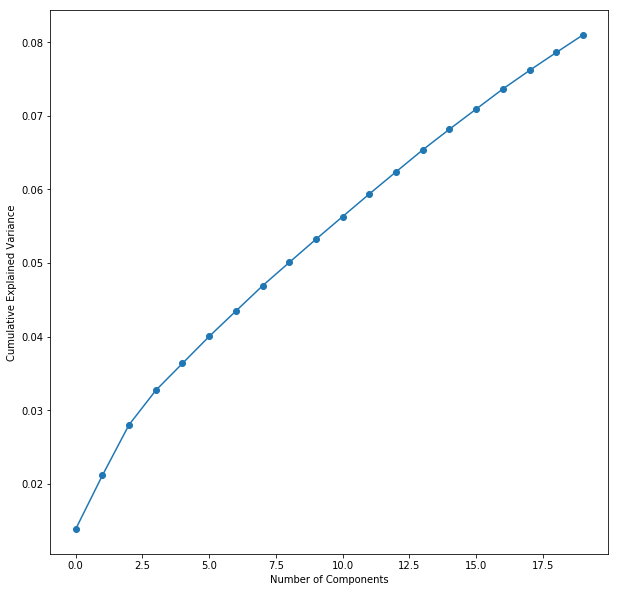

In [63]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('cumulative_explained_variance_unscaled.png')

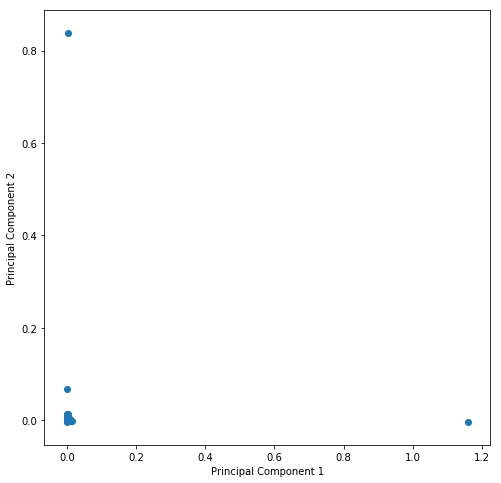

In [64]:
comp1 = (pca.fit_transform(tfidf_nolabel))[:,0:1].flatten()
comp2 = (pca.fit_transform(tfidf_nolabel))[:,1:2].flatten()

plt.figure(figsize=(8,8))
plt.scatter(comp1, comp2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pc1_pc2_unscaled.png')

In [65]:
# so that didn't work- maybe the data needs to be scaled before we can do this?

6100


In [67]:
tfidf_scaled = preproc.scale(tfidf_nolabel)
# this just uses standard scaler

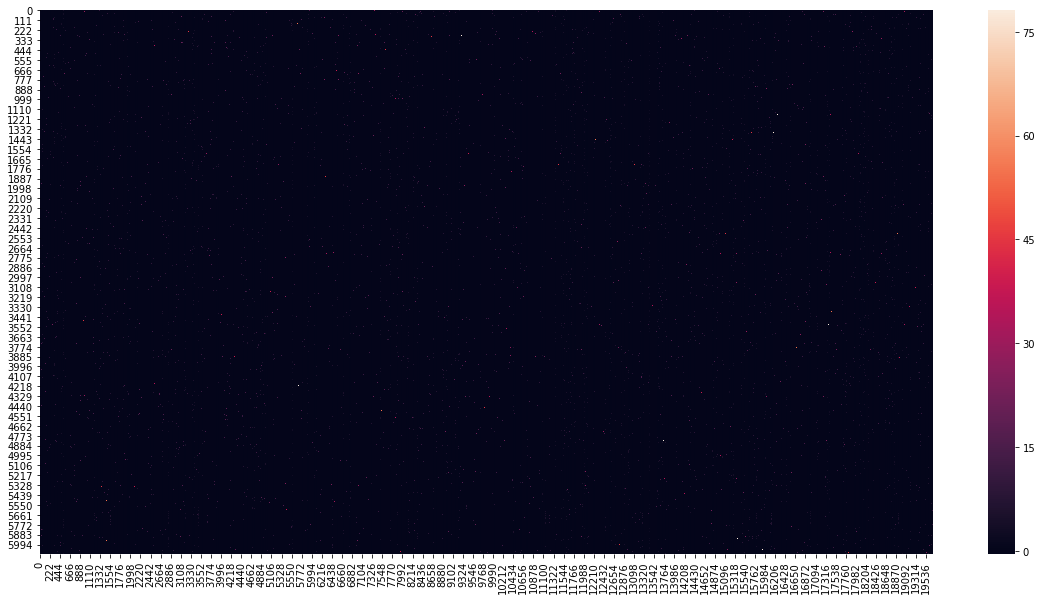

In [70]:
plt.figure(figsize=(20,10))
sb.heatmap(tfidf_scaled)

In [71]:
pca = sklearn.decomposition.PCA(n_components=20)
pca.fit(tfidf_scaled)                 
print(pca.explained_variance_ratio_) 

[0.00424525 0.00334696 0.0025984  0.00236336 0.00210049 0.00201035
 0.00192798 0.00178941 0.00169068 0.0016412  0.00156167 0.00152726
 0.00145095 0.00140598 0.00138267 0.0013265  0.00126194 0.0012385
 0.00116075 0.00109195]


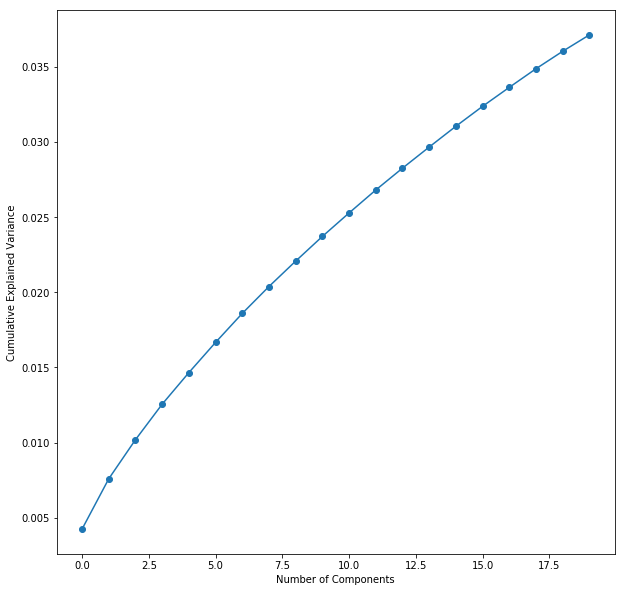

In [72]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('cumulative_explained_variance_scaled.png')

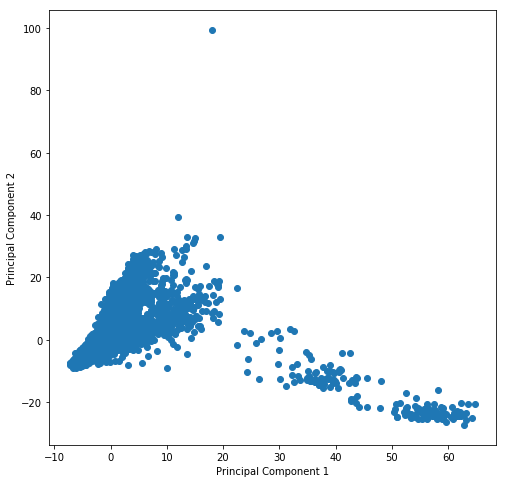

In [73]:
comp1 = (pca.fit_transform(tfidf_scaled))[:,0:1].flatten()
comp2 = (pca.fit_transform(tfidf_scaled))[:,1:2].flatten()

plt.figure(figsize=(8,8))
plt.scatter(comp1, comp2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pc1_pc2_scaled.png')

In [77]:
# so the percent variance explained is much worse but the data clusters beautifully into two nice little clusters
# let's just see what the hell these guys are because wow, thats different
comp1_2 = (pca.fit_transform(tfidf_scaled))[:,0:2]
kmeans = KMeans(n_clusters=2, random_state=0).fit(comp1_2)
predicted_test_clusts = kmeans.predict(pca.fit_transform(tfidf_test)[:,0:2])
# this is the test function
for num in range(0, len(predicted_test_clusts)):
    print 'drug ' + test_set_strings[num] + ' is predicted to be in cluster ' + str(predicted_test_clusts[num])
    
# at least it's clustering all in the same one?

drug ciprofloxacin-1522 is predicted to be in cluster 0
drug clindamycin-1373 is predicted to be in cluster 0
drug metronidazole-1503 is predicted to be in cluster 0
drug sulfamethoxazole-2296 is predicted to be in cluster 0
drug amoxicillin-1265 is predicted to be in cluster 0
drug benzathine benzylpenicillin-2939 is predicted to be in cluster 0
drug doxycycline-1113 is predicted to be in cluster 0
drug minocycline-1135 is predicted to be in cluster 0
drug cefuroxime-2526 is predicted to be in cluster 0
drug lincomycin-2380 is predicted to be in cluster 0
drug erythromycin-1510 is predicted to be in cluster 0
drug sulfasalazine-1733 is predicted to be in cluster 0
drug vancomycin-2498 is predicted to be in cluster 0
drug fusidic acid-1293 is predicted to be in cluster 0
drug ceftazidime-1721 is predicted to be in cluster 0
drug spectinomycin-2987 is predicted to be in cluster 0
drug streptomycin-1578 is predicted to be in cluster 0
drug paromomycin-3017 is predicted to be in cluster 0

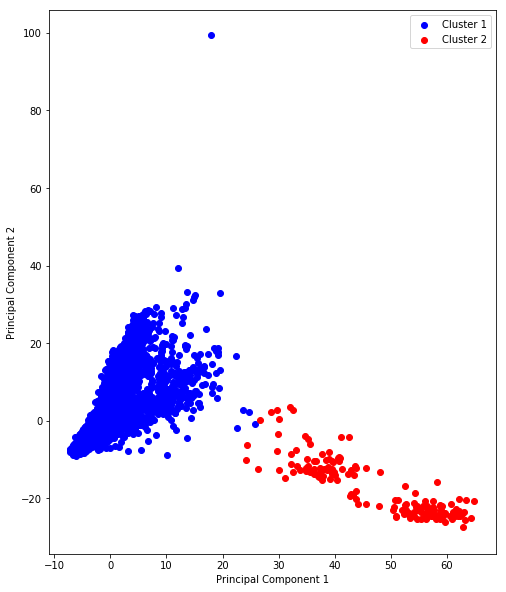

In [79]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(comp1_2)
kmeans_labels = kmeans.labels_.reshape(6100,1).flatten()

plt.figure(figsize=(8,10))
plt.scatter(comp1[kmeans_labels == 0], comp2[kmeans_labels == 0], color = 'blue')
plt.scatter(comp1[kmeans_labels == 1], comp2[kmeans_labels == 1], color = 'red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(('Cluster 1', 'Cluster 2'))
plt.savefig('kmeans_cluster_on_pca.png')

In [80]:
# okay so the kmeans does a good job- but what's inside each cluster?

In [88]:
indices_cluster0 = kmeans_labels == 0
indices_cluster1 = kmeans_labels == 1
print 'cluster 0'
print np.sum(indices_cluster0)
print tfidf_drug_names[indices_cluster0]


print 'cluster 1'
print np.sum(indices_cluster1)
print tfidf_drug_names[indices_cluster1]

cluster 0
5938
0                           1,4-chrysenequinone-1773
1                           1,4-chrysenequinone-7139
2                           1,5-isoquinolinediol-543
3       11-deoxy-16,16-dimethylprostaglandin E2-7514
4       11-deoxy-16,16-dimethylprostaglandin E2-7519
5       11-deoxy-16,16-dimethylprostaglandin E2-7533
6       11-deoxy-16,16-dimethylprostaglandin E2-7538
7                                    12,13-EODE-1108
8                16,16-dimethylprostaglandin E2-6562
9                16,16-dimethylprostaglandin E2-6592
10               16,16-dimethylprostaglandin E2-6597
11                       2,6-dimethylpiperidine-3806
12                       2,6-dimethylpiperidine-3889
13                       2,6-dimethylpiperidine-4363
14                       2,6-dimethylpiperidine-4543
15                       2,6-dimethylpiperidine-6049
16                      4,5-dianilinophthalimide-578
17                      4,5-dianilinophthalimide-624
18                             

In [93]:
# okay so there's 5938 in cluster 0 and only 162 in cluster 1
# very weird- let's go through all of cluster 1
cluster1_drugs = tfidf_drug_names[indices_cluster1]
unique_drug_names = []
for num_drug in range(0, len(cluster1_drugs)):
    curr_drug = cluster1_drugs.iloc[num_drug]
    split_words = curr_drug.split("-")
    drug_name = split_words[0]
    if drug_name not in unique_drug_names:
        unique_drug_names.append(drug_name)

print unique_drug_names

['HC toxin', 'rifabutin', 'scriptaid', 'trichostatin A', 'valproic acid', 'vorinostat']


In [141]:
def printUniqueDrugs(unique_drug_list):
    unique_drug_names = []
    for num_drug in range(0, len(unique_drug_list)):
        curr_drug = unique_drug_list.iloc[num_drug]
        split_words = curr_drug.split("-")
        drug_name = split_words[0]
        if drug_name not in unique_drug_names:
            unique_drug_names.append(drug_name)

    print unique_drug_names

In [94]:
# there's only 6!!!
# HC toxin - HDAC inhibitor
# rifabutin - rifamycin antibiotic 
# scriptaid - HDAC inhibitor
# trichostatin A - antifungal antibiotic, HDAC inhibitor
# valproic acid - "It is unclear exactly how valproate works.[1][4] Proposed mechanisms include affecting GABA levels, 
# blocking voltage-gated sodium channels, and inhibiting histone deacetylases." (wikipedia)
# vorinostat - HDAC inhibitor

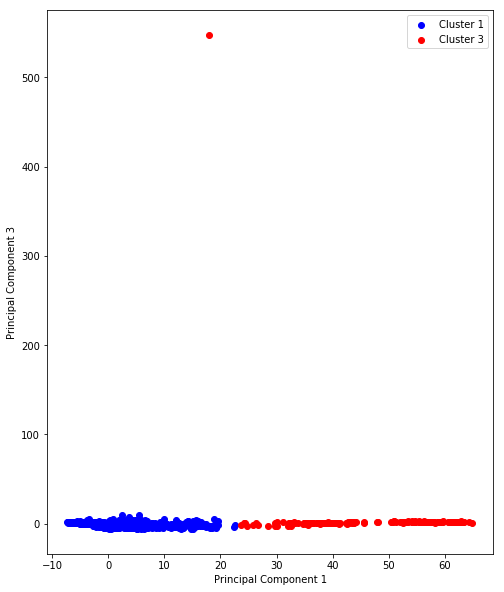

In [130]:
# okay... seems this has been done before
# let's look at other combos of PCs
indices = [0, 2]
comp1_3 = np.array((pca.fit_transform(tfidf_scaled))[:,indices])
comp3 = np.array((pca.fit_transform(tfidf_scaled))[:,2:3].flatten())

kmeans = KMeans(n_clusters=2, random_state=0).fit(comp1_3)
kmeans_labels = kmeans.labels_.reshape(6100,1).flatten()

plt.figure(figsize=(8,10))
plt.scatter(comp1[kmeans_labels == 0], comp3[kmeans_labels == 0], color = 'blue')
plt.scatter(comp1[kmeans_labels == 1], comp3[kmeans_labels == 1], color = 'red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(('Cluster 1', 'Cluster 3'))
plt.savefig('kmeans_cluster_on_pca1_3.png')

In [143]:
indices_cluster3 = kmeans_labels == 1

cluster3_drugs = tfidf_drug_names[indices_cluster3]
printUniqueDrugs(cluster3_drugs)

# same ones

['monastrol']


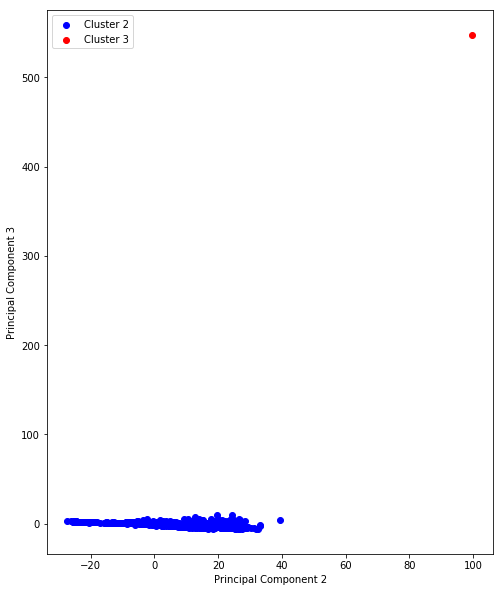

In [132]:
indices = [1, 2]
comp2_3 = np.array((pca.fit_transform(tfidf_scaled))[:,indices])

kmeans = KMeans(n_clusters=2, random_state=0).fit(comp2_3)
kmeans_labels = kmeans.labels_.reshape(6100,1).flatten()

plt.figure(figsize=(8,10))
plt.scatter(comp2[kmeans_labels == 0], comp3[kmeans_labels == 0], color = 'blue')
plt.scatter(comp2[kmeans_labels == 1], comp3[kmeans_labels == 1], color = 'red')

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(('Cluster 2', 'Cluster 3'))
plt.savefig('kmeans_cluster_on_pca2_3.png')

In [142]:
indices_cluster3 = kmeans_labels == 1
cluster3_drugs_new = tfidf_drug_names[indices_cluster3]
printUniqueDrugs(cluster3_drugs_new)

# same ones

['monastrol']


['monastrol']


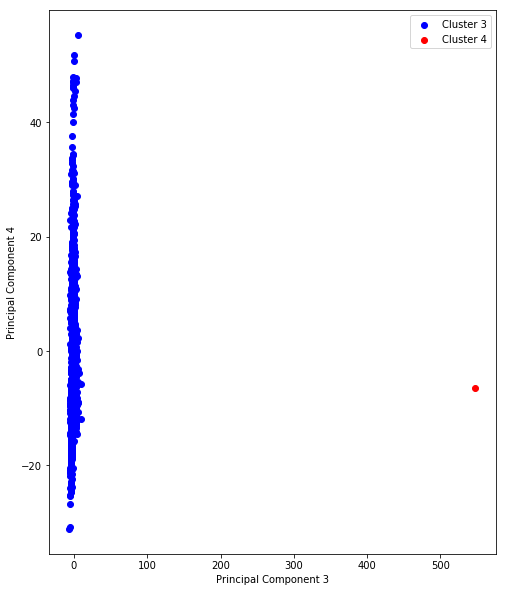

In [144]:
# PC 3 & 4
indices = [2, 3]
comp3_4 = np.array((pca.fit_transform(tfidf_scaled))[:,indices])
comp4 = np.array((pca.fit_transform(tfidf_scaled))[:,3:4].flatten())

kmeans = KMeans(n_clusters=2, random_state=0).fit(comp3_4)
kmeans_labels = kmeans.labels_.reshape(6100,1).flatten()

plt.figure(figsize=(8,10))
plt.scatter(comp3[kmeans_labels == 0], comp4[kmeans_labels == 0], color = 'blue')
plt.scatter(comp3[kmeans_labels == 1], comp4[kmeans_labels == 1], color = 'red')

plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
plt.legend(('Cluster 3', 'Cluster 4'))
plt.savefig('kmeans_cluster_on_pca3_4.png')

indices_cluster4 = kmeans_labels == 1
cluster4_drugs = tfidf_drug_names[indices_cluster4]
printUniqueDrugs(cluster4_drugs)

['1,4', '1,5', '11', '2,6', '4,5', '(+)', '(+/', '(', '0173570', '0179445', '0225151', '0317956', '10', '15(S)', '15', '16', '2', '3', '4', '5666823', '5707885', '6', '7', '8', 'AG', 'BCB000038', 'BCB000039', 'BCB000040', 'C', 'CP', 'Chicago Sky Blue 6B', 'F0447', 'Gly', 'H', 'HC toxin', 'HNMPA', 'IC', 'L', 'LM', 'LY', 'MK', 'MS', 'N', 'N6', 'NS', 'NU', 'PF', 'PHA', 'PNU', 'Prestwick', 'R', 'S', 'SB', 'SC', 'SR', 'STOCK1N', 'TTNPB', 'Trolox C', 'U0125', 'W', 'abamectin', 'acacetin', 'acebutolol', 'aceclofenac', 'acemetacin', 'acenocoumarol', 'acepromazine', 'acetazolamide', 'acetohexamide', 'acetylsalicylic acid', 'acetylsalicylsalicylic acid', 'aciclovir', 'aconitine', 'adenosine phosphate', 'adiphenine', 'adipiodone', 'adrenosterone', 'ajmaline', 'albendazole', 'alclometasone', 'alcuronium chloride', 'alexidine', 'alfadolone', 'alfaxalone', 'alfuzosin', 'alimemazine', 'allantoin', 'alpha', 'alprenolol', 'alprostadil', 'altizide', 'altretamine', 'alverine', 'alvespimycin', 'amantadine

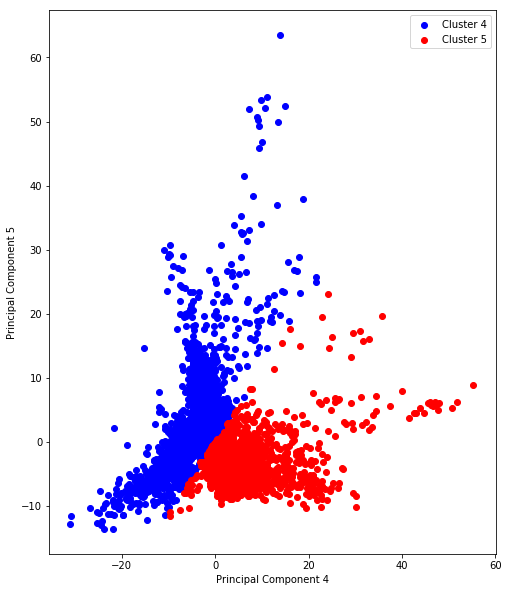

In [146]:
# PC 4 & 5
indices = [3, 4]
comp4_5 = np.array((pca.fit_transform(tfidf_scaled))[:,indices])
comp5 = np.array((pca.fit_transform(tfidf_scaled))[:,4:5].flatten())

kmeans = KMeans(n_clusters=2, random_state=0).fit(comp4_5)
kmeans_labels = kmeans.labels_.reshape(6100,1).flatten()

plt.figure(figsize=(8,10))
plt.scatter(comp4[kmeans_labels == 0], comp5[kmeans_labels == 0], color = 'blue')
plt.scatter(comp4[kmeans_labels == 1], comp5[kmeans_labels == 1], color = 'red')

plt.xlabel('Principal Component 4')
plt.ylabel('Principal Component 5')
plt.legend(('Cluster 4', 'Cluster 5'))
plt.savefig('kmeans_cluster_on_pca4_5.png')

indices_cluster5 = kmeans_labels == 0
cluster5_drugs = tfidf_drug_names[indices_cluster5]
printUniqueDrugs(cluster5_drugs)

In [ ]:
## Lets shift gears and do t-sne
tfidf_embed = manifold.TSNE().fit_transform(tfidf_scaled)
#X_embedded.shape

In [ ]:
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(tfidf_scaled)                 
print(pca.explained_variance_ratio_) 

In [ ]:
# uh oh too long to do tSNE on raw matrix!! pca first then tsne
# tune in for the next episode in tsne_03_13_19.ipynb